<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch03_03_%EA%B8%B0%EB%8C%80%EA%B0%92%EA%B3%BC_%EB%B6%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.03. 기대값과 분산
---
* 날짜:
* 이름:

## 학습내용
    - 기대값
    - 분산
    - 공분산
    - 상관계수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **| 기댓값**

\begin{align}
\mu_X = \text{E}[X] = \sum_{x_i \in \Omega} x_ip(x_i) 
\end{align}


In [24]:
def E(X, P=[]):
  # P를 따로 정해주지 않으면 가중치를 1/n
  if not len(P):
    P = np.array([1/len(X)]*len(X))
  return np.sum(X*P) # 넘파이 배열을 쓰면 브로드캐스팅이 된다.
  

In [25]:
X = np.array([1,2])
P = np.array([0.2, 0.8])
E(X) # P 를 

1.5

#### **예제 01. 공정한 주사위**



In [32]:
X = np.arange(1,7)
E(X)

3.5

#### **예제 02. 공정하지 않은 주사위**

짝수가 나올 확률이 홀수가 나올 확률의 두배인 주사위의 기대값을 구하세요.

In [31]:
P = np.array([1/9, 2/9, 1/9, 2/9, 1/9, 2/9])
print(P)
E(X,P)

[0.11111111 0.22222222 0.11111111 0.22222222 0.11111111 0.22222222]


3.666666666666666

#### **예제 03. 기대값의 성질**

X, Y, c 가 아래와 같이 주어졌을 때,
```
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])
```

다음을 구하세요
```
E(X)
E(Y)
E(c)
E(X+Y)
E(X)+E(Y)
E(4X+3)
4E(X)+3
```

In [33]:
X = np.array([1,2,3,4])
Y = np.array([10,20,30,40])
c = np.array([4])

In [35]:
print(E(X))
print(E(Y))
print(E(c))
print(E(X+Y))
print(E(X)+E(Y))
print(E(4*X+3))
print(4*E(X)+3)

2.5
25.0
4.0
27.5
27.5
13.0
13.0


#### **예제 04. 시험 성적**

학생 네명의 시험 성적이 다음과 같을 때 총합점수의 평균(국어+수학) 을 두가지 방법으로 구하세요.

```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

In [36]:
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])

In [37]:
print(E(X_국어+X_수학))
print(E(X_국어)+E(X_수학))

130.0
130.0


### **| 분산**

\begin{align}
V(X) = E[(X-E[X])^2]
\end{align}


In [14]:
def V(X, P=[]):
  if not len(P):
    P = np.array([1/len(X)]*len(X))
  return E( (X - E(X, P) )**2 )

In [17]:
X = np.array([1,2,3])
P = np.array([1/10, 1/10, 8/10])
print(E(X), V(X)) # P가 똑같은 확률일 때
print(E(X, P), V(X, P)) # P가 다른 확률일 때

2.0 0.6666666666666666
2.7 1.156666666666667


#### **예제 01. 동전 던지기**

두개의 동전을 던졌을 때 앞면이 나온 횟수를 확률 변수 X라 정의합니다.

다음을 구하세요.

```
X
P
E(X)
V(X)
```


In [38]:
X = np.array([0, 1, 2]) # 앞면이 0번, 1번 2번 나올때
P = np.array([1/4, 2/4, 1/4]) # 확률이 각각 다른 가중치를 들고있다.

In [39]:
E(X)

1.0

In [40]:
V(X)

0.6666666666666666

#### **예제 02. 분산의 성질**


X,Y 가 아래와 같이 주어졌을 때

```
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])
```

다음을 구하세요.

```
V(X)
V(c)
V(2X)
V(2X-2)
4 x V(X)
```

In [41]:
X = np.array([1,2,3,4,5,6,7,8,9])
c = np.array([10])

In [42]:
print(V(X))
print(V(c)) # 분산이 왜 0인가?
print(V(2*X))
print(V(2*X-2))
print(4*V(X))

6.666666666666666
0.0
26.666666666666664
26.666666666666664
26.666666666666664


#### **예제 03. 시험 성적**

학생 네명의 시험 성적이 다음과 같습니다.
```
X_국어 = np.array([60,70,90,100])
X_수학 = np.array([70,30,50,50])
```

다음을 구하세요.
```
V(X_국어)
V(X_수학)
V(5*X_국어)
5*5*V(X_국어)
```


In [43]:
X_국어 = np.array([60,70,90,100]) # 모든 변수를 설정 할 때 넘파이 어레이로 설정 해야함
X_수학 = np.array([70,30,50,50])

In [44]:
print(V(X_국어))
print(V(X_수학))
print(V(5*X_국어))
print(5*5*V(X_국어))

250.0
200.0
6250.0
6250.0


### **| 공분산**


\begin{align}
\text{Cov}(X, Y) = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]
\tag{7.5.3}
\end{align}

In [46]:
def C(X, Y, PX = [], PY = []):  # X와 Y에 각각 값이 다른 확률을 적용시킨다.
  if not len(P):  # 만약 P값을 설정하지 않을 경우 동일한 확률이 된다.
    PX = np.array([1/len(X)]*len(X))
  if not len(P):  # Y의 P도 같은 설정
    PY = np.array([1/len(Y)]*len(Y))
  return E( (X - E(X, PX)) * (Y - E(Y, PY)) )

In [47]:
X = np.array([10,20,30,40])
Y = np.array([40,30,20,10])
Z = np.array([10,20,10,20])

In [48]:
C(X, Y),C(X, Z)

(-125.0, 25.0)

### **| 상관계수**


* 피어슨(Pearson) 상관계수

\begin{align}
\rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{V}[X] \cdot \text{V}[Y]}}
\end{align}

\begin{align}
-1 \leq \rho \leq 1
\end{align}




In [49]:
def Pe(X, Y, PX = [], PY = []):
  if not len(P):
    PX = np.array([1/len(X)]*len(X))
  if not len(P):
    PY = np.array([1/len(Y)]*len(Y))
  return C(X, Y) / np.sqrt(V(X, PX) * V(Y, PY))

In [50]:
Pe(X, Y), Pe(X, Z)

(-1.0, 0.4472135954999579)

#### **예제 01. 두 뽑기의 확률**

두 뽑기 A, B에서 나오는 숫자들의 확률이 아래와 같을 때 X와Y의 공분산과 상관계수를 구하세요.
```
X = [0,1,2]
P(X) = [1/5, 2/5, 2/5]
Y = [0, 1, 2]
P(Y) = [1/5, 3/5, 1/5]
```

In [56]:
X = np.array([0,1,2])
PX = np.array([1/5, 2/5, 2/5]) # X의 확률을 설정
Y = np.array([0, 1, 2])
PY = np.array([1/5, 3/5, 1/5]) # Y의 확률을 설정

In [57]:
print(C(X,Y, PX, PY))
print(Pe(X,Y , PX, PY))

0.6666666666666666
0.9712858623572641


#### **예제 02. 표본 그리기 1**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
x.shape, y.shape
```

1. a 값이 `-1,0.7,0.3,0.01,-0.3,-0.7,-1` 일 때 x, y의 표본쌍 7개의 스캐터 플롯을 그리고, 
2. 각 경우에 x, y의 상관계수를 구하세요.


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # 산점도를 그리기 위해서 matplotlib을 불러온다.

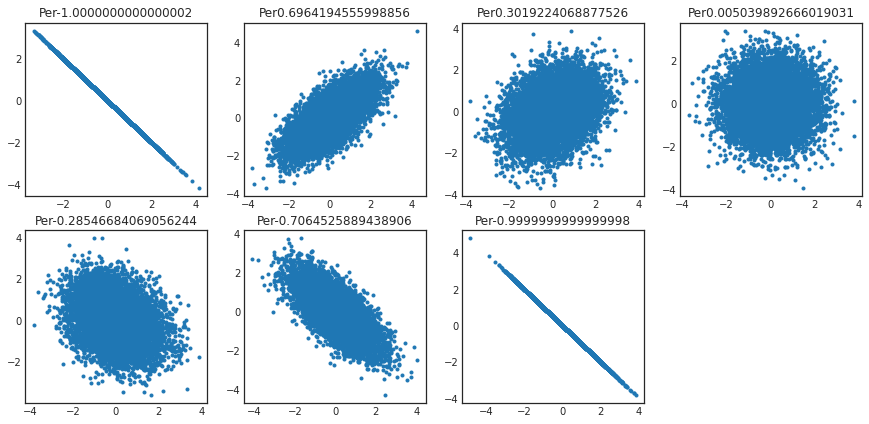

In [85]:
plt.figure(figsize=(15,7)) # 그래프 크기 조정
for i, a in enumerate([-1,0.7,0.3,0.01,-0.3,-0.7,-1]):  # enumerate를 사용해 a값의 번호를 정해준다.
  x, y = np.random.multivariate_normal([0, 0], [[1, a], [a, 1]], 10000).T
  plt.subplot(2,4,i+1)
  plt.title(f'Per{Pe(x,y)}')  # 타이틀을 각각의 상관계수로 정한다.
  plt.scatter(x,y, marker='.')

#### **예제 03. 표본 그리기 2**

아래 코드는 표본을 10000개 추출 합니다.



```
x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
x.shape, y.shape
```


1. x 표본은 그대로 두고, y 표본에 `1, 0.7, 0.3, 0.01, -0.3, -0.7, -1`을 각각 곱해서 각 표본쌍의 스캐터 플롯 7개를 그리세요.
2. 7가지 경우에 대한 x, y 상관계수를 구하세요.


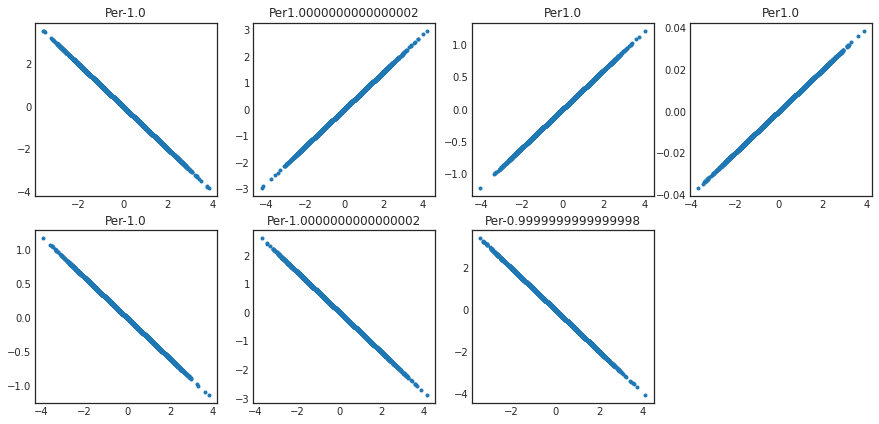

In [87]:
plt.figure(figsize=(15,7))
for i, a in enumerate([-1,0.7,0.3,0.01,-0.3,-0.7,-1]):
  x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 10000).T
  plt.subplot(2,4,i+1)
  plt.title(f'Per{Pe(x,y*a)}')  # 타이틀을 각각의 상관계수로 정한다.
  plt.scatter(x,y*a, marker='.')